In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
print(sns.__version__)

0.11.2


In [25]:
data=sns.load_dataset("penguins")
data=data.dropna()
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


##Hisplot
* 가장 기본적으로 사용되는 히스토그램을 출력하는 plot
* 전체 데이터를 특정 구간별 정보를 확인할 때 사용함

<AxesSubplot:title={'center':'Distribution over body_mass'}, xlabel='body_mass_g', ylabel='Count'>

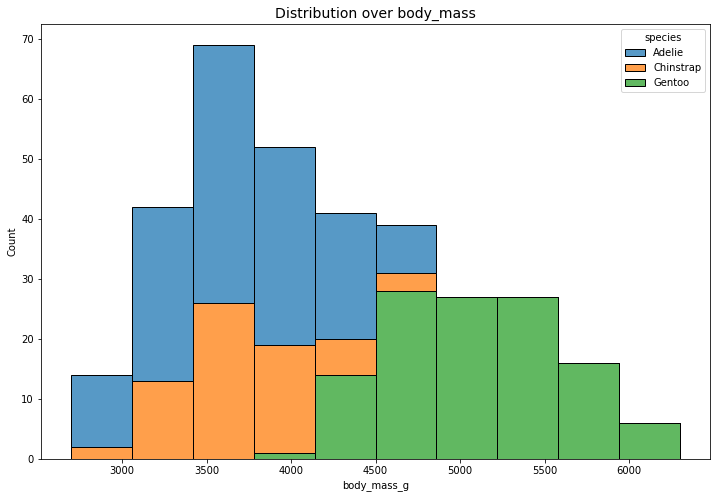

In [26]:
plt.figure(figsize=(12,8))
plt.title("Distribution over body_mass", fontsize=14)
sns.histplot(data=data, x="body_mass_g", bins=10, hue="species", multiple="stack") #bins를 통해서 얼만큼 세분화해서 볼지 결정할 수 있다., stack: 쌓이는 모양으로 그래프 확인 가능

## Displot
* distribution들을 여러 subplot 들로 나눠서 출력해주는 plot
*displot 에 kind를 변경하는 것으로 histplot, kdeplot, ecdfplot 모두 출력이 가능합니다.

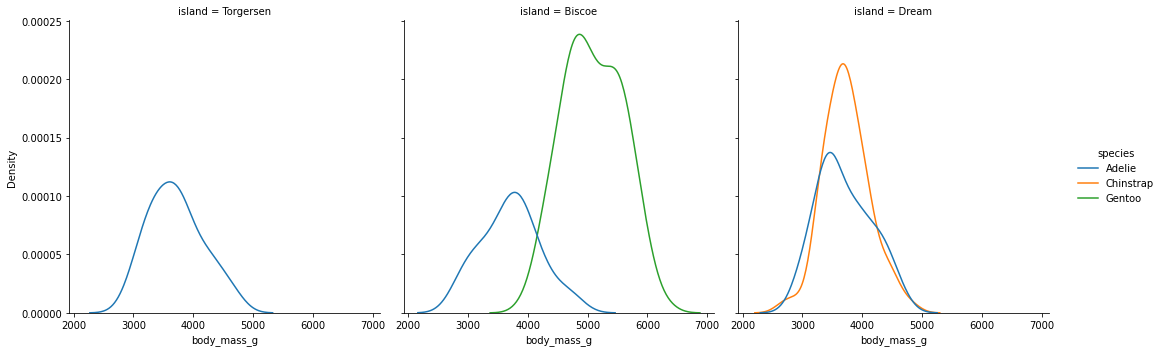

In [30]:
# penguin 데이터에 displot을 출력합니다.
sns.displot(data=data, kind="kde", x="body_mass_g", hue="species", col="island")
plt.show()

## Barplot
*어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot
*가로/세로 두 가지로 모두 출력 가능합니다.
*히스토그램과는 다름

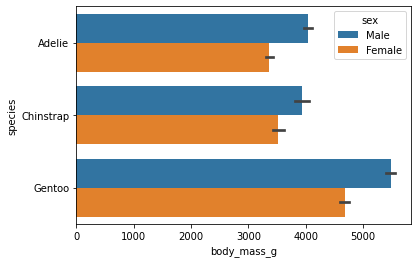

In [34]:
#penguin  데이터에 barplot을 출력하빈다.
sns.barplot(data=data, x="body_mass_g", y="species", hue="sex")
plt.show()

## Countplot
* 범주형 속성을 가지는 데이터의 histogram을 보여주는 plot
* 종류별 count를 보여주는 방법입니다.

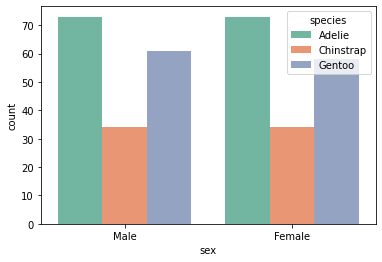

In [36]:
#penguin 데이터에 countplot을 출력합니다.
sns.set_palette("Set2")
sns.countplot(data=data, x="sex", hue="species")
plt.show()

## Boxplot

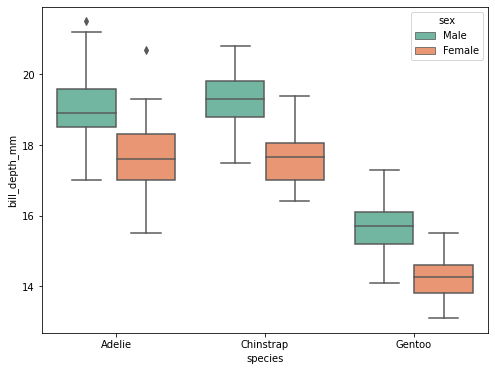

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x="species", y="bill_depth_mm",hue="sex")
plt.show()

## Violinplot

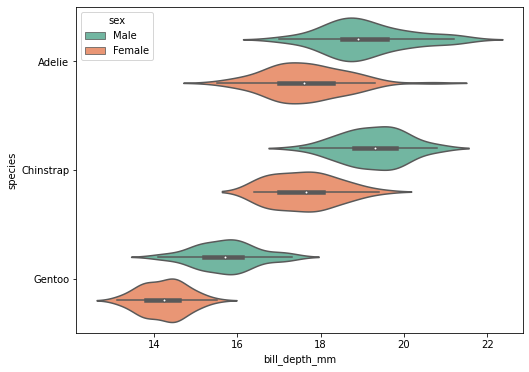

In [40]:
plt.figure(figsize=(8,6))
sns.violinplot(data=data,y="species", x="bill_depth_mm", hue="sex")
plt.show()

## Lineplot-경향파악시 사용

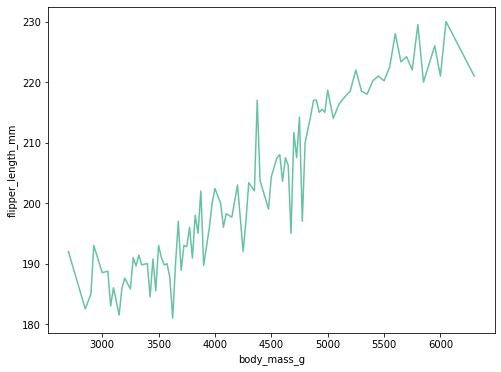

In [42]:
plt.figure(figsize=(8,6))
sns.lineplot(data=data, x="body_mass_g", y="flipper_length_mm", ci=None) #ci: 범위 나타내는 것 지우고 선만 남기는 기능
plt.show()

## Pointplot

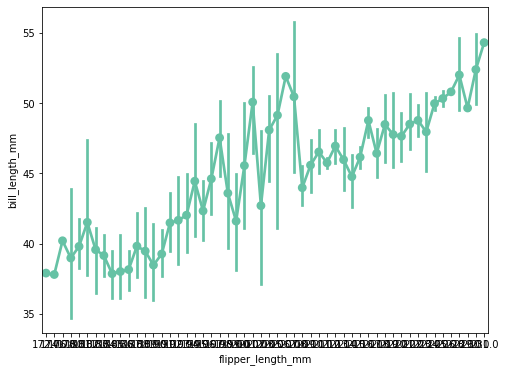

In [43]:
plt.figure(figsize=(8,6))
sns.pointplot(data=data, x="flipper_length_mm", y="bill_length_mm")
plt.show()

## Scatterplot

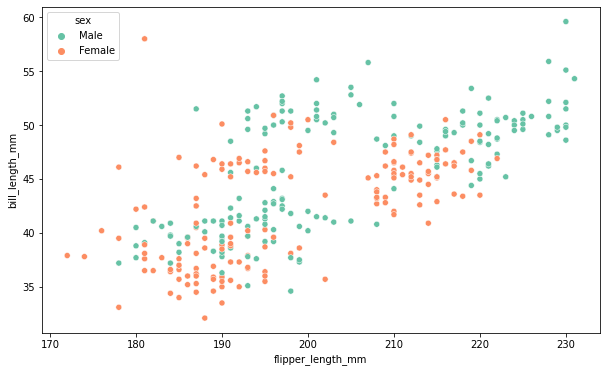

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,  x="flipper_length_mm", y="bill_length_mm", hue="sex")
plt.show()

## Pairplot
* 주어진 데이터의 각 feature 들 사이의 관계를 표시하는 plot
* scatterplot, FacetGrid, kdeplot 을 이용하여 feature 간의 관계를 잘 보여줍니다.
* 각 feature에 대해 계산된 모든 결과를 보여주기 때문에, feature 가 많은 경웅 사용하기 적합하지 않습니다.
*

<Figure size 720x720 with 0 Axes>

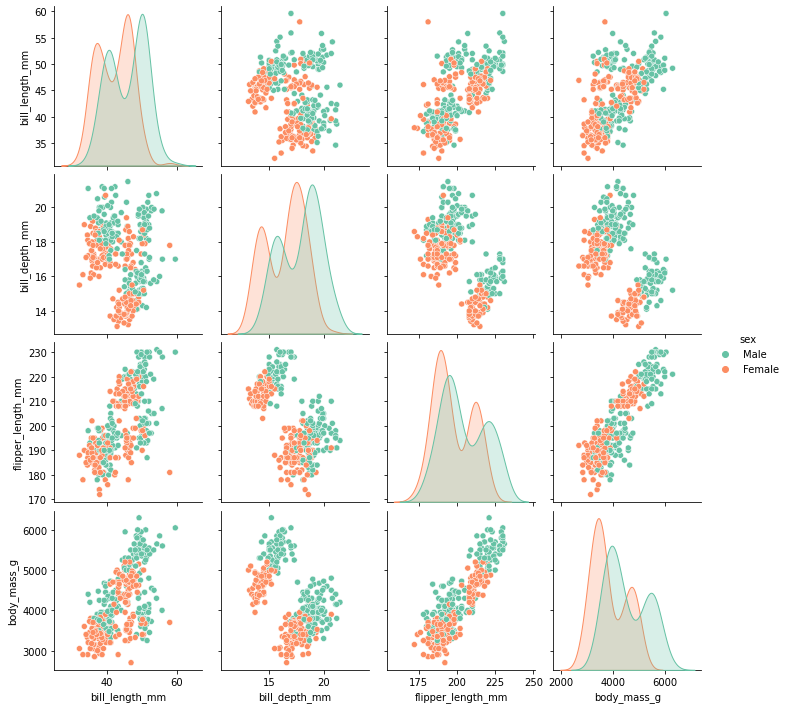

In [50]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data, hue="sex")
plt.show()

## Heatmap
* 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot
* 말 그대로 heatmap 이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.
* pairplot과 비슷하게 feature 간 관계를 시각화 할 때 많이 사용합니다 .

## 상관관계란?
* 어떤 X값의 변화에 따라 Y 값의 선형적으로 변화하는지를 측정한 지표
* [-1, 1]
* -1로 갈수록 반대의 경향성, 1로 갈쑤록 같은 방향으로 가는 경향성을 띈다.
*

In [53]:
# 각 feature간 상관관계를 파악하기 위해 Correlation matrix
corr=data.corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


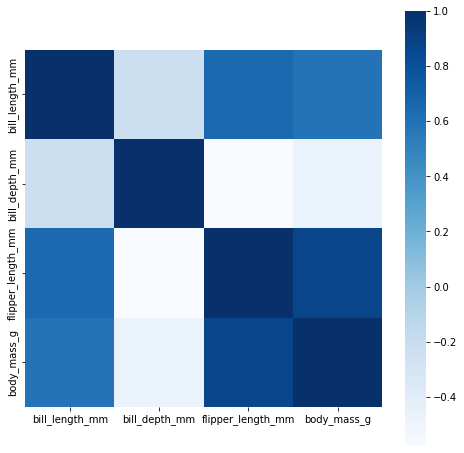

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, square=True, cmap="Blues")
plt.show()